<a href="https://colab.research.google.com/github/Abhishek-singh0416/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis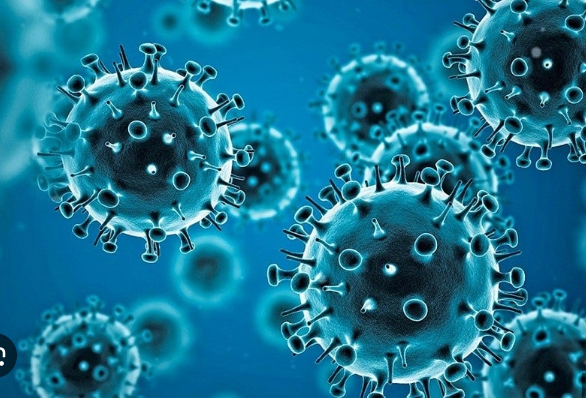



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Abhishek Singh**


# **Project Summary -**

The aim of this project is to build a robust classification model to predict the sentiment of tweets related to COVID-19. These tweets have been extracted from Twitter and manually tagged to ensure accurate sentiment labels. For privacy considerations, the names and usernames associated with these tweets have been anonymized using codes..

# **GitHub Link -**

[gitHub Link](https://github.com/Abhishek-singh0416/Coronavirus-Tweet-Sentiment-Analysis)

# **Problem Statement**



The primary objective is to create a model that can accurately classify the sentiment of each tweet as positive, negative, or neutral, thereby enabling better understanding of public opinion and sentiment regarding the COVID-19 pandemic.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np               # For numerical operations
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA


### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Abhishek-singh0416/Coronavirus-Tweet-Sentiment-Analysis/main/Coronavirus%20Tweets.csv', encoding='latin-1')



### Dataset First View

In [ ]:
# Dataset First Look
data.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

### Dataset Information

In [ ]:
# Dataset Info
data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum()
missing_values

In [ ]:
# Visualizing the missing values
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Number of Missing Values in Each Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

Data Size:

The dataset contains 41,157 rows and 6 columns.


Duplicates:

There are no duplicate entries in the dataset.


Missing Values:

The 'location' column has 8,590 missing values.
The other columns do not have any missing values.




Data Types:

The 'user name' and 'screen name' columns are of integer data type.
The remaining columns are of object (string) data type.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe()

### Variables Description

**username:**

Data Type: Integer

Description: This column contains encoded numbers representing the usernames of the people who posted the tweets.


**screenname:**

Data Type: Integer

Description: This column contains encoded numbers representing the screen names of the users.


**location:**

Data Type: Object

Description: This column contains the location from where the tweet was posted. It has 8,590 missing values.


**tweet at:**

Data Type: Object


Description: This column contains the timestamp indicating when the tweet was posted.


**original tweet:**

Data Type: Object

Description: This column contains the text of the original tweet that was posted.


**sentiment:**

Data Type: Object


Description: This column contains the sentiment of the tweet, which could be positive, negative, etc.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = {col: data[col].nunique() for col in data.columns}
for col, unique_count in unique_values.items():
    print(f'{col}: {unique_count} unique values')

unique_sentiment =[data['Sentiment'].unique()]
print(unique_sentiment)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')



In [ ]:
data.drop('UserName', axis=1, inplace=True)
data.drop('ScreenName', axis=1, inplace=True)





### What all manipulations have you done and insights you found?

Converted 'tweet at' from object (string) to datetime format. The conversion involved specifying the format %d-%m-%Y


Replaced all missing values in the 'location' column with the string 'unknown'


dorp user name and screen name

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title('Sentiment Ratio')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

i chose barchart , to compare the count of sentiments in data

##### 2. What is/are the insight(s) found from the chart?

chats shows that highes sentiment is positive then negetive then neutral

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code


# Group by year and sentiment, then count occurrences
sentiment_date_counts = data.groupby(['TweetAt', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a line plot for each sentiment
for sentiment in sentiment_date_counts.columns:
    plt.plot(sentiment_date_counts.index, sentiment_date_counts[sentiment], marker='o', label=sentiment)

# Add titles and labels
plt.title('date-wise Sentiment Distribution')
plt.xlabel('data')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')

# Display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

i use the line chart to see the trends in sentiment
Line charts are excellent for showing trends over time

##### 2. What is/are the insight(s) found from the chart?

Negative and extremely negative sentiments are the most frequent s. This indicates a generally pessimistic or critical attitude in the tweets related to COVID-19 over the observed period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data['Location'] = data['Location'].fillna('unknown')

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
sentiment_mapping = {
    'Extremely Negative': 1,
    'Negative': 2,
    'Neutral': 3,
    'Positive': 4,
    'Extremely Positive': 5
}

# Apply the mapping to the 'sentiment' column
data['Sentiment_Encoded'] = data['Sentiment'].map(sentiment_mapping)

data.head(5)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re

# Dictionary of contractions and their expansions
contractions_dict = {
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "It's": "It is",
    "we're": "we are",
    "they're": "they are",
    "can't": "cannot",
    "won't": "will not",
    "didn't": "did not",
    "isn't": "is not",
    "aren't": "are not",
    "I've": "I have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "I'd": "I would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "I'll": "I will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "they'll": "they will",
    "let's": "let us",
    "that's": "that is",
    "who's": "who is",
    "what's": "what is",
    "here's": "here is",
    "there's": "there is",
    "when's": "when is",
    "where's": "where is",
    "why's": "why is",
    "how's": "how is",
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
}

# Function to expand contractions
def expand_contractions(text, contractions_dict):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in contractions_dict.keys()) + r')\b')
    return pattern.sub(lambda x: contractions_dict[x.group()], text)

#  Expand contractions
data['cleaned_tweet'] = data['OriginalTweet'].apply(lambda x: expand_contractions(x, contractions_dict))





In [ ]:
data[['OriginalTweet','cleaned_tweet']].head(50)

#### 2. Lower Casing

In [ ]:
# Lower Casing
data['cleaned_tweet'] = data['cleaned_tweet'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits


def clean_text(text):
    text = re.sub(r'http\S+', '', text)# Remove URLs
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub('\n', ' ', text)  # Remove new lines
    text = re.sub('\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub('[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    return text

# Apply text cleaning
data['cleaned_tweet'] = data['cleaned_tweet'].apply(clean_text)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
def remove_extra_spaces(text):
    # Remove leading and trailing white spaces
    text = text.strip()
    # Replace multiple spaces with a single space
    text = ' '.join(text.split())
    return text
    return text

data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_extra_spaces)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text



#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize

data['cleaned_tweet'] = data['cleaned_tweet'].apply(word_tokenize)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Perform stemming on each word
def stem_words(words):
  stemmed_words = [stemmer.stem(word) for word in words]

  return stemmed_words

data['cleaned_tweet'] = data['cleaned_tweet'].apply(stem_words)


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer






lemmatizer = WordNetLemmatizer()
# Function to lemmatize a sentence
def lemmatize_sentence(words):

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words


data['cleaned_tweet'] = data['cleaned_tweet'].apply(lemmatize_sentence)


In [ ]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: ' '.join(x))

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text




##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(data['cleaned_tweet'])
y = data['Sentiment']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()


# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Function to predict sentiment of new tweets
def predict_sentiment(new_tweets):
    new_tweets = [remove_punctuation(tweet) for tweet in new_tweets]
    new_tweets = [remove_punctuation(tweet) for tweet in new_tweets]
    new_tweets_cleaned = [clean_text(tweet) for tweet in new_tweets]
    new_tweets_tfidf = tfidf.transform(new_tweets_cleaned)
    predictions = model.predict(new_tweets_tfidf)
    return predictions

# Example new tweets
new_tweets = [
    str(input("inputr a tweet")),

]

# Predict sentiment
predictions = predict_sentiment(new_tweets)
print(predictions)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***